<a href="https://colab.research.google.com/github/Keerthana-Mathaiyan/Luxury-Housing-Sales-Analysis/blob/master/Luxury_Housing_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Import Dictionary successful")

Import Dictionary successful


In [2]:
df=pd.read_csv('/content/Luxury_Housing_Bangalore.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [3]:
print(df.columns)

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')


In [4]:
print(df.isnull().sum())

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft          10046
Configuration               0
Ticket_Price_Cr         10019
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10090
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18287
dtype: int64


In [5]:
df['Micro_Market']=df['Micro_Market'].str.title().str.strip()
print(df['Micro_Market'])
print('title case changed and space removed from Micro_Market column')

0             Sarjapur Road
1               Indiranagar
2         Bannerghatta Road
3              Bellary Road
4               Koramangala
                ...        
100995         Bellary Road
100996         Bellary Road
100997          Hennur Road
100998          Rajajinagar
100999           Whitefield
Name: Micro_Market, Length: 101000, dtype: object
title case changed and space removed from Micro_Market column


In [6]:
#====================================renaming developer_name to Builder ======================


df.rename(columns={'Developer_Name':'Builder'},inplace=True)
print(df.columns)

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Builder',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')


In [7]:
#Unit_Size_Sqft
print('Total number of null values in Before:',df['Unit_Size_Sqft'].isnull().sum())
df['Unit_Size_Sqft']=df['Unit_Size_Sqft'].fillna(df['Unit_Size_Sqft'].mean())

df['Unit_Size_Sqft']=df['Unit_Size_Sqft'].astype(int)
print('Total number of null values in After:',df['Unit_Size_Sqft'].isnull().sum())

Total number of null values in Before: 10046
Total number of null values in After: 0


In [8]:
#Configuration

df.loc[:,'Configuration']=df['Configuration'].astype(str).str.upper()
df['Configuration'].head(20)

,Configuration
0,4BHK
1,3BHK
2,4BHK
3,3BHK
4,4BHK
5,4BHK
6,5BHK+
7,3BHK
8,3BHK
9,4BHK


In [9]:
#Ticket_Price_Cr
#1. Clean up column: remove 'Cr' and '₹', convert to float

df.loc[:,'Ticket_Price_Cr']=(df['Ticket_Price_Cr']
                             .astype(str)
                             .str.replace('Cr','',regex=False)
                             .str.replace('₹', '', regex=False)
                             .str.strip()
                             .astype(float)
                             )
# 2. Convert to float (invalid strings → NaN automatically)
df["Ticket_Price_Cr"] = pd.to_numeric(df["Ticket_Price_Cr"], errors="coerce")

# 3. Replace negative values with NaN
df["Ticket_Price_Cr"] = df["Ticket_Price_Cr"].mask(df["Ticket_Price_Cr"] <= 0, np.nan)

# 4. Fill blanks (NaN) with column mean
mean_value = df["Ticket_Price_Cr"].mean(skipna=True)
df["Ticket_Price_Cr"] = df["Ticket_Price_Cr"].fillna(mean_value)

print('TTL no of null values',df['Ticket_Price_Cr'].isnull().sum())

df['Ticket_Price_Cr'].head(28)

TTL no of null values 0


,Ticket_Price_Cr
0,12.750846
1,16.292152
2,10.517724
3,9.396367
4,15.345392
5,9.820000
6,10.896752
7,9.357539
8,12.299449
9,9.193310


In [10]:
#==========================Price_per_Sqft============================

# 1. Price per sqft (₹ per sqft)

df.loc[:,'Price_per_Sqft']=(df['Ticket_Price_Cr'] * 1e7/df['Unit_Size_Sqft']).round(2)
df['Price_per_Sqft'].head()

,Price_per_Sqft
0,31679.12
1,28284.99
2,13646.98
3,15175.01
4,21471.10


In [11]:
#====Transaction_Type====

print(df['Transaction_Type'].value_counts())

Transaction_Type
Secondary    50506
Primary      50494
Name: count, dtype: int64


In [12]:
#======================= Create Booking_Flag from Transaction_Type=======================
# Let's assume Primary = booked (1), Secondary = not booked (0)
df['Booking_Flag'] = df['Transaction_Type'].str.lower().map({'primary': 1, 'secondary': 0})
print(df['Booking_Flag'])


0         1
1         1
2         1
3         1
4         0
         ..
100995    0
100996    1
100997    1
100998    0
100999    1
Name: Booking_Flag, Length: 101000, dtype: int64


In [13]:
#======Purchase_Quarter==============

# 1. Convert to datetime (coerce invalid → NaT)
df['Purchase_Quarter'] = pd.to_datetime(df['Purchase_Quarter'], errors='coerce')

# 2. Extract quarter number (1–4), replace NaT with 0
df['Quarter_Number'] = (
    df['Purchase_Quarter']
    .dt.quarter
    .fillna(0)
    .astype(int)
)

print(df['Quarter_Number'].value_counts())


Quarter_Number
3    25301
1    25281
2    25263
4    25155
Name: count, dtype: int64


In [14]:
#===========Connectitivity=============

df['Connectivity_Score']=df['Connectivity_Score'].round(2)
print(df['Connectivity_Score'])

0         7.99
1         4.84
2         8.13
3         7.50
4         4.53
          ... 
100995    8.55
100996    6.88
100997    6.75
100998    4.44
100999    7.76
Name: Connectivity_Score, Length: 101000, dtype: float64


In [15]:
#=================Amenity_Score=================

df.loc[:, 'Amenity_Score'] = df.groupby('Micro_Market')['Amenity_Score'].transform(lambda x: x.fillna(x.mean()))
df['Amenity_Score']=df['Amenity_Score'].round(2)

print('Total number of null values in Amenity_score column is ', df['Amenity_Score'].isnull().sum())
print(df['Amenity_Score'])

Total number of null values in Amenity_score column is  0
0         5.46
1         7.53
2         8.67
3         5.72
4         8.61
          ... 
100995    6.22
100996    9.78
100997    8.38
100998    5.76
100999    9.99
Name: Amenity_Score, Length: 101000, dtype: float64


In [16]:
df['NRI_Buyer']=df['NRI_Buyer'].map({'yes':True, 'no':False})


In [17]:
#==============Buyer_Comments==============

df.loc[:,'Buyer_Comments']=df['Buyer_Comments'].fillna('No Commands')
#print(df['Buyer_Comments'])
print('TTL no of null values', df['Buyer_Comments'].isnull().sum())



TTL no of null values 0


In [18]:
df.isnull().sum()


,0
Property_ID,0
Micro_Market,0
Project_Name,0
Builder,0
Unit_Size_Sqft,0
Configuration,0
Ticket_Price_Cr,0
Transaction_Type,0
Buyer_Type,0
Purchase_Quarter,0


In [19]:
df.duplicated().sum()

np.int64(1000)

In [20]:
df.drop_duplicates(inplace= True)

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.dtypes

,0
Property_ID,object
Micro_Market,object
Project_Name,object
Builder,object
Unit_Size_Sqft,int64
Configuration,object
Ticket_Price_Cr,float64
Transaction_Type,object
Buyer_Type,object
Purchase_Quarter,datetime64[ns]


In [23]:
df.columns


Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Builder',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments', 'Price_per_Sqft',
       'Booking_Flag', 'Quarter_Number'],
      dtype='object')

In [24]:
df['Possession_Status']

,Possession_Status
0,Launch
1,Under construction
2,Ready to move
3,Ready to move
4,Under construction
...,...
99995,Under construction
99996,Launch
99997,Launch
99998,Under construction


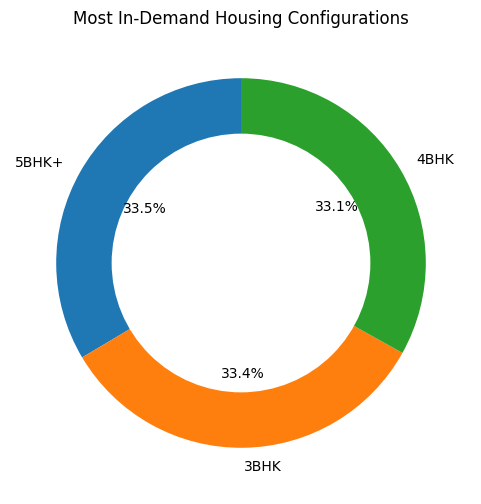

In [25]:

# Count frequency of each configuration
counts = df["Configuration"].value_counts()

# --- Donut Chart ---
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # <-- creates the "donut hole"
)

# Add title
plt.title("Most In-Demand Housing Configurations")

# Add a white circle in the middle (for a cleaner donut look)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


In [38]:
list_of_columns=list(df.columns)
print(list_of_columns)

['Property_ID', 'Micro_Market', 'Project_Name', 'Builder', 'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr', 'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter', 'Connectivity_Score', 'Amenity_Score', 'Possession_Status', 'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score', 'Avg_Traffic_Time_Min', 'Buyer_Comments', 'Price_per_Sqft', 'Booking_Flag', 'Quarter_Number']
